In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from scipy import stats
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [221]:
HP200_E1 = pd.read_csv('../Paper/HP200 small E1.csv')
HP200_E1.tail()

,Amino Acid Length,Amino Acids on Grid,Shortened Acid Path
39995,200,10,RLSRSRLL
39996,200,16,SSLLRSLRLLSSLL
39997,200,10,LSLSSSLL
39998,200,11,RRLLRRSLL
39999,200,11,RRLLSRLRR


In [222]:
data = HP200_E1.groupby('Amino Acid Length')['Amino Acids on Grid'].agg(['mean', 'std', 'min', 'max'])
data.rename(columns={'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

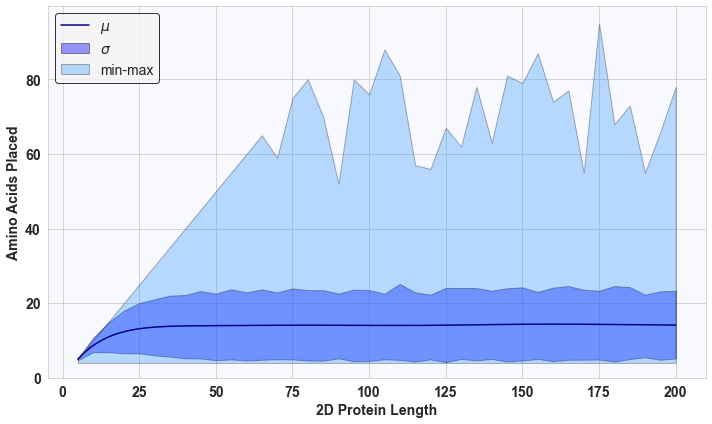

In [223]:
# First, we calculate the required statistics for 'Amino Acids on Grid' per 'Amino Acid Length'
stats = HP200_E1.groupby('Amino Acid Length')['Amino Acids on Grid'].agg(['mean', 'std', 'min', 'max'])

# Fit polynomial regression on the mean values
degree = 8
coeffs_mean = np.polyfit(stats.index, stats['mean'], degree)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(stats.index.min(), stats.index.max(), 100)

# Plotting
plt.figure(figsize=(10, 6),facecolor='white')
sns.set_style("whitegrid", {"axes.facecolor": "#F8F8FF"})

# Plot mean values
# sns.scatterplot(x=stats.index, y=stats['mean'], color='dodgerblue', label='Mean')

# Plot polynomial regression curve for mean values
plt.plot(x_values, np.polyval(coeffs_mean, x_values), color='darkblue', label='$\mu$')

# Add standard deviation as a transparent area around the mean
plt.fill_between(stats.index, stats['mean'] - stats['std'], stats['mean'] + stats['std'], color='blue', alpha=0.4, label='$\sigma$', edgecolor='black')

# Add min-max range as a transparent area
plt.fill_between(stats.index, stats['min'], stats['max'], color='dodgerblue', alpha=0.3, label='min-max', edgecolor='black')


plt.xlabel("2D Protein Length", fontsize=14, fontweight='bold')
plt.ylabel("Amino Acids Placed", fontsize=14, fontweight='bold')
plt.ylim(bottom=0)  # Set the y-axis range to start from 0
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

legend = plt.legend(fontsize=14, loc='upper left', frameon=True)
legend.get_frame().set_facecolor('whitesmoke')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.savefig("Figure 1.png", format='png', dpi=200)
plt.show()

In [224]:
HP200_E2 = pd.read_csv('../Paper/HP200 small E2.csv')
HP200_E2.tail()

,Amino Acid Length,Amino Acids on Grid,Shortened Acid Path
39995,200,47,RLRSRSLRRLSSSLLSSRRSSSLLSRSRSLLSSSSLLSRRLRSRR
39996,200,71,SLSLRRSRSLLRLRSSSLSSLSLLRRSSSSSRRLSLRSLRLLRLSR...
39997,200,14,LSLRLRLLSLRL
39998,200,88,SLRSSSLLRLRRLRRLRSSLLRLRLRSRRLLSLSSSSSRLLSRLRR...
39999,200,158,LSSSRLLRRLSLLRSSLRLRRLRSRSSLSSLRSSRLLSSRRLLRSR...


In [225]:
data = HP200_E2.groupby('Amino Acid Length')['Amino Acids on Grid'].agg(['mean', 'std', 'min', 'max'])
data.rename(columns={'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

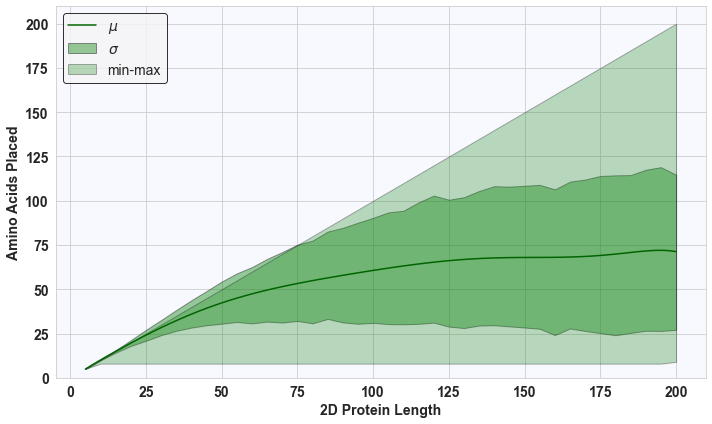

In [226]:
# First, we calculate the required statistics for 'Amino Acids on Grid' per 'Amino Acid Length'
stats = HP200_E2.groupby('Amino Acid Length')['Amino Acids on Grid'].agg(['mean', 'std', 'min', 'max'])

# Fit polynomial regression on the mean values
degree = 8
coeffs_mean = np.polyfit(stats.index, stats['mean'], degree)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(stats.index.min(), stats.index.max(), 100)

# Plotting
plt.figure(figsize=(10, 6),facecolor='white')
sns.set_style("whitegrid", {"axes.facecolor": "#F8F8FF"})

# Plot mean values
# sns.scatterplot(x=stats.index, y=stats['mean'], color='dodgerblue', label='Mean')

# Plot polynomial regression curve for mean values
plt.plot(x_values, np.polyval(coeffs_mean, x_values), color='darkgreen', label='$\mu$')

# Add standard deviation as a transparent area around the mean
plt.fill_between(stats.index, stats['mean'] - stats['std'], stats['mean'] + stats['std'], color='green', alpha=0.4, label='$\sigma$', edgecolor='black')

# Add min-max range as a transparent area
plt.fill_between(stats.index, stats['min'], stats['max'], color='forestgreen', alpha=0.3, label='min-max', edgecolor='black')


plt.xlabel("2D Protein Length", fontsize=14, fontweight='bold')
plt.ylabel("Amino Acids Placed", fontsize=14, fontweight='bold')
plt.ylim(bottom=0)  # Set the y-axis range to start from 0
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

legend = plt.legend(fontsize=14, loc='upper left', frameon=True)
legend.get_frame().set_facecolor('whitesmoke')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.savefig("Figure 2.png", format='png', dpi=200)
plt.show()

In [227]:
# Create zero collions df for experiment 1
shapes1 = HP200_E1.groupby(['Amino Acid Length', 'Amino Acids on Grid']).size().reset_index(name='Quantity')
shapes1 = shapes1[(shapes1['Amino Acids on Grid'] % 5 == 0) & (shapes1['Amino Acid Length'] == shapes1['Amino Acids on Grid'])]  # Updated this line
shapes1 = shapes1.drop(columns='Amino Acid Length')
shapes1.head()

# Create zero collions df for experiment 2
shapes2 = HP200_E2.groupby(['Amino Acid Length', 'Amino Acids on Grid']).size().reset_index(name='Quantity')
shapes2 = shapes2[(shapes2['Amino Acids on Grid'] % 5 == 0) & (shapes2['Amino Acid Length'] == shapes2['Amino Acids on Grid'])]  # Updated this line
shapes2 = shapes2.drop(columns='Amino Acid Length')
shapes2.head()

# Merge experimental data
merged_df = pd.merge(shapes1, shapes2, on='Amino Acids on Grid', how='outer', suffixes=(' E1', ' E2'))
merged_df = merged_df.rename(columns={'Amino Acids on Grid': 'Amino Acid Length'})
merged_df = merged_df.fillna(0)

# add synthethical data based on prior work by Jansen et al.
merged_df['Quantity Reitze'] = (2.6024 * np.exp(-0.1294 * merged_df['Amino Acid Length'].values) *1000)
merged_df.head()

,Amino Acid Length,Quantity E1,Quantity E2,Quantity Reitze
0,5,941.0,1000,1362.653765
1,10,648.0,994,713.504950
2,15,374.0,962,373.601371
3,20,227.0,938,195.623007
4,25,120.0,870,102.430997


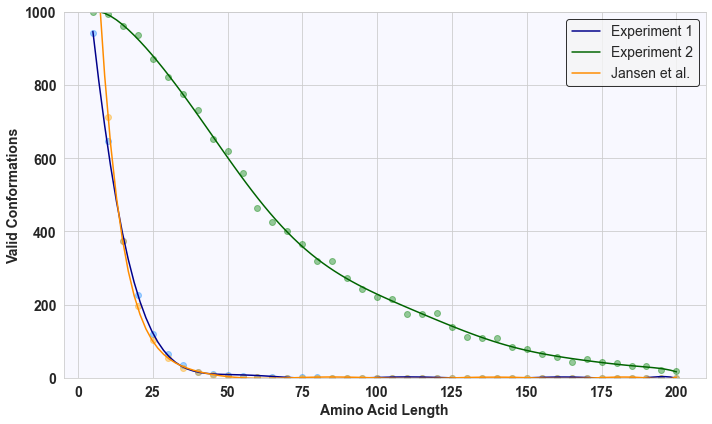

In [228]:
# Degree of the polynomial fit
degree = 10

# Fit polynomial regression to merged_df for Quantity E1
coeffs_merged_e1 = np.polyfit(merged_df['Amino Acid Length'], merged_df['Quantity E1'], degree)
# Fit polynomial regression to merged_df for Quantity E2
coeffs_merged_e2 = np.polyfit(merged_df['Amino Acid Length'], merged_df['Quantity E2'], degree)
# Fit polynomial regression to merged_df for Quantity Reitze
coeffs_merged_reitze = np.polyfit(merged_df['Amino Acid Length'], merged_df['Quantity Reitze'], degree)

# Generating x values from the range of your data for plotting the polynomial curves
x_values = np.linspace(merged_df['Amino Acid Length'].min(), merged_df['Amino Acid Length'].max(), 100)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"axes.facecolor": "#F8F8FF"})

# Plotting merged_df data
plt.scatter(merged_df['Amino Acid Length'], merged_df['Quantity E1'], color='dodgerblue', alpha=0.4)
plt.scatter(merged_df['Amino Acid Length'], merged_df['Quantity E2'], color='green', alpha=0.4 )
plt.scatter(merged_df['Amino Acid Length'], merged_df['Quantity Reitze'], color='orange', alpha=0.4 )
# Plotting the polynomial regression curves
plt.plot(x_values, np.polyval(coeffs_merged_e1, x_values), color='darkblue', linestyle='-', label='Experiment 1')
plt.plot(x_values, np.polyval(coeffs_merged_e2, x_values), color='darkgreen', linestyle='-', label='Experiment 2')
plt.plot(x_values, np.polyval(coeffs_merged_reitze, x_values), color='darkorange', linestyle='-', label='Jansen et al.')

plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
plt.ylabel("Valid Conformations", fontsize=14, fontweight='bold')
plt.ylim(bottom=0)  # Setting the y-axis range to start from 0
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.ylim(bottom=0, top=1000)  # Setting the y-axis range to start from 0 and go up to 1000

legend = plt.legend(fontsize=14, loc='upper right', frameon=True)
legend.get_frame().set_facecolor('whitesmoke')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.savefig("Figure 3-1.png", format='png', dpi=200)
plt.show()

In [229]:
# convert data to plot P(collisions=0)
probability_df = merged_df.copy()
probability_df[['Quantity E1', 'Quantity E2', 'Quantity Reitze']] /= 1000
merged_df['Quantity Reitze'] = (2.6024 * np.exp(-0.1294 * merged_df['Amino Acid Length'].values) *1000)

probability_df.head()

,Amino Acid Length,Quantity E1,Quantity E2,Quantity Reitze
0,5,0.941,1.000,1.362654
1,10,0.648,0.994,0.713505
2,15,0.374,0.962,0.373601
3,20,0.227,0.938,0.195623
4,25,0.120,0.870,0.102431


<Figure size 720x432 with 0 Axes>

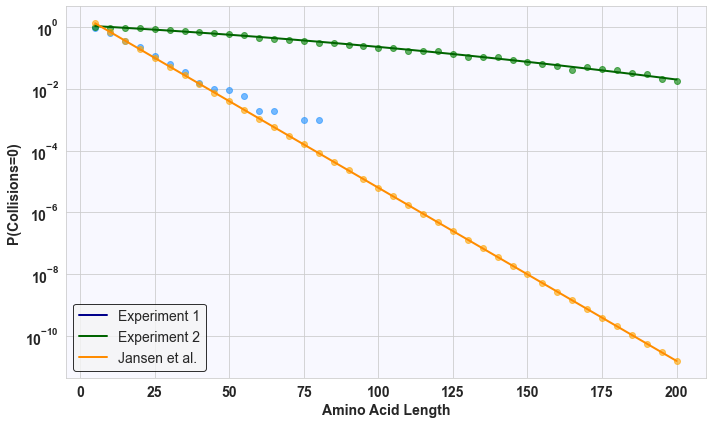

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = probability_df['Amino Acid Length']
y1 = probability_df['Quantity E1']
y2 = probability_df['Quantity E2']
y3 = probability_df['Quantity Reitze']

# Fit polynomial regression to the data
degree = 2
coeffs1 = np.polyfit(x, np.log(y1), degree)
coeffs2 = np.polyfit(x, np.log(y2), degree)
coeffs3 = np.polyfit(x, np.log(y3), degree)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"axes.facecolor": "#F8F8FF"})


# Generating x values from the range of your data for plotting the polynomial curves
x_values = np.linspace(x.min(), x.max(), 100)
y_fit1 = np.exp(np.polyval(coeffs1, x_values))
y_fit2 = np.exp(np.polyval(coeffs2, x_values))
y_fit3 = np.exp(np.polyval(coeffs3, x_values))

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, color='dodgerblue', marker='o', alpha=0.6)
plt.scatter(x, y2, color='green', marker='o', alpha=0.6)
plt.scatter(x, y3, color='orange', marker='o', alpha=0.6)

plt.yscale('log')  # Set the vertical axis to log scale
plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
plt.ylabel("P(Collisions=0)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Plot fitted lines
plt.plot(x_values, y_fit1, color='darkblue', linestyle='-', linewidth=2, label='Experiment 1')
plt.plot(x_values, y_fit2, color='darkgreen', linestyle='-', linewidth=2, label='Experiment 2')
plt.plot(x_values, y_fit3, color='darkorange', linestyle='-', linewidth=2, label='Jansen et al.')

legend = plt.legend(fontsize=14, frameon=True)
legend.get_frame().set_facecolor('whitesmoke')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

In [231]:
# use formulas from papers to create synthetical data
synthetical_df = probability_df.copy()
synthetical_df['Quantity E1'] = (1556.88 * np.exp(-0.10 * merged_df['Amino Acid Length'].values))
synthetical_df['Quantity E2'] = (1227.38 * np.exp(-0.02 * merged_df['Amino Acid Length'].values))
synthetical_df[['Quantity E1', 'Quantity E2']] /= 1000

synthetical_df.head()

,Amino Acid Length,Quantity E1,Quantity E2,Quantity Reitze
0,5,0.944295,1.110579,1.362654
1,10,0.572744,1.004894,0.713505
2,15,0.347387,0.909265,0.373601
3,20,0.210701,0.822737,0.195623
4,25,0.127796,0.744444,0.102431


<Figure size 720x432 with 0 Axes>

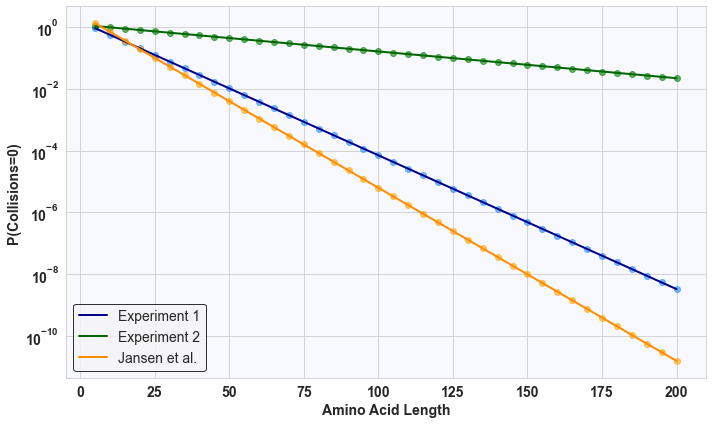

In [232]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = synthetical_df['Amino Acid Length']
y1 = synthetical_df['Quantity E1']
y2 = synthetical_df['Quantity E2']
y3 = synthetical_df['Quantity Reitze']

# Fit polynomial regression to the data
degree = 2
coeffs1 = np.polyfit(x, np.log(y1), degree)
coeffs2 = np.polyfit(x, np.log(y2), degree)
coeffs3 = np.polyfit(x, np.log(y3), degree)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"axes.facecolor": "#F8F8FF"})


# Generating x values from the range of your data for plotting the polynomial curves
x_values = np.linspace(x.min(), x.max(), 100)
y_fit1 = np.exp(np.polyval(coeffs1, x_values))
y_fit2 = np.exp(np.polyval(coeffs2, x_values))
y_fit3 = np.exp(np.polyval(coeffs3, x_values))

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, color='dodgerblue', marker='o', alpha=0.6)
plt.scatter(x, y2, color='green', marker='o', alpha=0.6)
plt.scatter(x, y3, color='orange', marker='o', alpha=0.6)

plt.yscale('log')  # Set the vertical axis to log scale
plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
plt.ylabel("P(Collisions=0)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Plot fitted lines
plt.plot(x_values, y_fit1, color='darkblue', linestyle='-', linewidth=2, label='Experiment 1')
plt.plot(x_values, y_fit2, color='darkgreen', linestyle='-', linewidth=2, label='Experiment 2')
plt.plot(x_values, y_fit3, color='darkorange', linestyle='-', linewidth=2, label='Jansen et al.')

legend = plt.legend(fontsize=14, frameon=True)
legend.get_frame().set_facecolor('whitesmoke')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.savefig("Figure 3-2.png", format='png', dpi=200)
plt.show()